# <font color=red>SMU DS 7331 DATA MINING - LAB 3 CLUSTERING</font>

**Team Members:**
- YuMei Bennett
- Liang Huang
- Ganesh Kodi
- Eric McCandless

## <font color=blue>Business Understanding (10 points total)</font>

**[10 points] Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?**

We used the "adult" dataset from the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Adult).  The dataset contains 1994 Census data.  It has 48,842 records and 14 attributes. Each record represents demographic information about an individual. 

The data was originally collected to predict income levels for individuals based on demographic attributes.  Here, we are going to perform a Cluster analysis using the following two variables from the data set to identify groups of objects that show evidence of homogeneity.   
- Years of Education
- Occupation

We will run 3 different clustering algorithms and measure the effectiveness of each:
- k-means
- Hierarchical
- DBScan

The effectiveness of the algorithm will be measured by the methods shown below.  These validation methods make the most sense as we want to know how many individuals were classified correctly and we want to minimize running time.
- Visualizations
- Accuracy
- Time of algorithm

## <font color=blue>Data Understanding (20 points total)</font>

**[10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?**

**[10 points] Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.**

The following tasks were accomplished in this section:

- Read in oringinal dataset and add attribute names.
- Dropped all but two attributes to include in analysis (Years of education and Occupaton).
- Evaluated and described meaning and type of data.
- Re-categorized missing data values in Occupation ("?") to "Other_category."
- Simple data visualizations

In [1]:
#Read in dataset and add attribute names and check.
import pandas as pd
col_names = ['age', 'employ_type', 'pop_num', 'edu_level', 'edu_years', 'marital', 'occ', 'relation', 'race', 'gender', 'cap_gain', 'cap_loss', 'hours_week', 'country_orig', 'income']
df = pd.read_csv('adult.csv', names=col_names, header=None)


#Select only the Years of Education and Occupation variables for dataframe to conduct Cluster analysis.
df1 = df.filter(['edu_years','occ'], axis=1)
df1.head(2)

,edu_years,occ
0,13,Adm-clerical
1,13,Exec-managerial


In [2]:
#List the attributes and the corresponding value type.
print (df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 2 columns):
edu_years    32561 non-null int64
occ          32561 non-null object
dtypes: int64(1), object(1)
memory usage: 508.8+ KB
None


In [3]:
#List basic statistics to see the min and max for Years of Education attribute.
print (df1.describe())

          edu_years
count  32561.000000
mean      10.080679
std        2.572720
min        1.000000
25%        9.000000
50%       10.000000
75%       12.000000
max       16.000000


In [4]:
#List the categories for Occupation attribute.
print (df['occ'].value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occ, dtype: int64


Based on the analysis above and source material, here are the two attributes with data type and values/scale.


| Attribute    | Data Type | Description                                                          | Values/Scale                                                                                                                                                                                                                                                                                                                                                                                                                             |   |
|--------------|-----------|----------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-:|
                                                                                                                                                                                                                                                           |   |
| edu_years    | integer   | Years of education                                                   | 1 - 16                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      |   |
| occ          | nominal   | Occupation                                                           | Tech-­support, Craft­-repair, Other-­service, Sales, Exec­-managerial, Prof­-specialty, Handlers-­cleaners, Machine­-op-­inspct, Adm­-clerical, Farming-fishing, Transport-­moving, Priv­-house-­serv, Protective­-serv, Armed­-Forces, ?   

Handling missing values:  There are missing values in Occupation.  These were transformed to "Other_category" value.  

Handling outliers:  Not concerned about outliers for Years of Education as the range is 1-16.

In [18]:
#import all necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import Imputer
import seaborn as sns

#Replace "?" with "Other_category" in Occupation attribute
df1['occ'] = df1['occ'].str.replace('?','Other_category')

#Transform Occupation into multiple columns with 0 and 1
# use pd.concat to join the new columns with original dataframe then drop the original 'Occupation' column (don't need it anymore)
df2 = pd.concat([df1,pd.get_dummies(df1['occ'], prefix='occ_')],axis=1)
df2.drop(['occ'],axis=1, inplace=True)

df2.head(2)

,edu_years,occ__ Adm-clerical,occ__ Armed-Forces,occ__ Craft-repair,occ__ Exec-managerial,occ__ Farming-fishing,occ__ Handlers-cleaners,occ__ Machine-op-inspct,occ__ Other-service,occ__ Other_category,occ__ Priv-house-serv,occ__ Prof-specialty,occ__ Protective-serv,occ__ Sales,occ__ Tech-support,occ__ Transport-moving
0,13,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,13,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


**Data Visualizations**

Looking at the distribution of Years of Education, we see that most ages are in the 9 to 13 years range with median around 10.

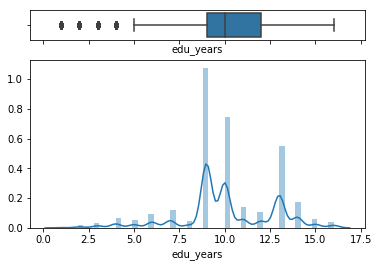

In [19]:
# Check the distribution of Years of Education
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df1["edu_years"], ax=ax_box)
sns.distplot(df1["edu_years"], ax=ax_hist)

Looking at the distribution of Occupations, we see that the highest proportion of occupations are "Other" which could be a problem explaining.  However, several other occupations are well represented.

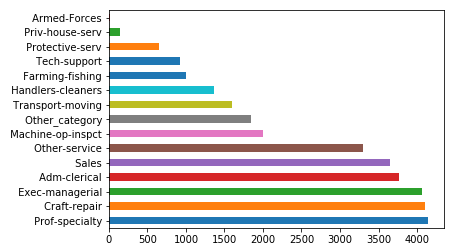

In [20]:
df1['occ'].value_counts()[:20].plot(kind='barh')

Looking at the relationship between Occupations and Years of Education, we see that there does not appear to be a lot of median variation in Education relative to Occupation.

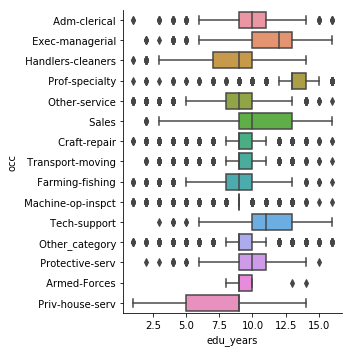

In [21]:
sns.catplot(x="edu_years",y="occ",kind='box',data=df1)

 ## <font color=blue>Modeling and Evaluation (50 points total)</font>

Different tasks will require different evaluation methods. Be as thorough as possible when analyzing the data you have chosen and use visualizations of the results to explain the performance and expected outcomes whenever possible. Guide the reader through your analysis with plenty of discussion of the results. Each option is broken down by:

- [10 Points] Train and adjust parameters
- [10 Points] Evaluate and Compare
- [10 Points] Visualize Results
- [20 Points] Summarize the Ramifications

Option A: Cluster Analysis

- Train: Perform cluster analysis using several clustering methods (adjust parameters).
- Eval: Use internal and/or external validation measures to describe and compare the clusterings and the clusters— how did you determine a suitable number of clusters for each method?
- Visualize: Use tables/visualization to discuss the found results. Explain each visualization in detail.
- Summarize: Describe your results. What findings are the most interesting and why?    

**Clustering Algorithm 1:  K-Means**

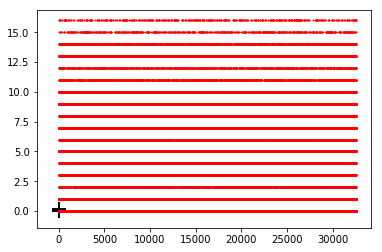

In [71]:
from sklearn.cluster import KMeans

# run kmeans algorithm (this is the most traditional use of k-means)
kmeans = KMeans(init='random', # initialization
        n_clusters=10,  # number of clusters
        n_init=1,       # number of different times to run k-means
        n_jobs=-1)

kmeans.fit(df2)

# visualize the data
centroids = kmeans.cluster_centers_
centroids
labels = kmeans.labels_
labels

plt.plot(df2, 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids

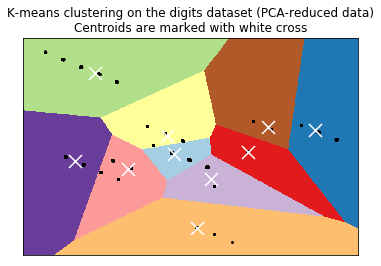

In [72]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

reduced_data = PCA(n_components=2).fit_transform(df2)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)



# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [67]:
from time import time
from sklearn import metrics
sample_size = 300
def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

print(100 * '_')
print('init\t\t\t\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tsilhouette')
print(100 * '_')
bench_k_means(KMeans(init='k-means++', n_clusters=5, n_init=10),
              name="k-means++ for 5 cluster for pca data", data=reduced_data)
bench_k_means(KMeans(init='k-means++', n_clusters=5, n_init=10),
              name="k-means++ for 5 cluster for original", data=df2)
bench_k_means(KMeans(init='k-means++', n_clusters=10, n_init=10),
              name="k-means++ for 10 cluster for pca data", data=reduced_data)
bench_k_means(KMeans(init='k-means++', n_clusters=10, n_init=10),
              name="k-means++ for 10 cluster for oroginal", data=df2)


____________________________________________________________________________________________________
init					time	inertia	homo	compl	v-meas	ARI	silhouette
____________________________________________________________________________________________________
k-means++ for 5 cluster for pca data	0.20s	47762	0.692	1.000	0.818	0.660	0.655
k-means++ for 5 cluster for original	0.46s	74680	0.692	1.000	0.818	0.660	0.501
k-means++ for 10 cluster for pca data	0.36s	8660	0.827	0.806	0.816	0.712	0.764
k-means++ for 10 cluster for oroginal	0.68s	31997	0.840	0.825	0.832	0.745	0.509


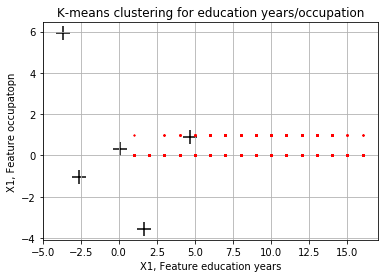

In [39]:
plt.plot(df2.iloc[:, 0], df2.iloc[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=200, linewidths=3, color='k')  # plot the centroids
plt.title('K-means clustering for education years/occupation')
plt.xlabel('X1, Feature education years')
plt.ylabel('X1, Feature occupatopn')
plt.grid()
plt.show()

**Clustering Algorithm 2: Hierarchical**

**Clustering Algorithm 3: DBScan**

## <font color=blue>Deployment (10 points total)</font>

Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

- How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)?
- How would your deploy your model for interested parties?
- What other data should be collected?
- How often would the model need to be updated, etc.?

## <font color=blue>Exceptional Work (10 points total)</font>

You have free reign to provide additional analyses or combine analyses.